## Measures of Central Tendency

- Mean: average of the data. Is a dangerous metric if you have atypical data.
- Median: middle value. Avoid atypical data. If it's a pair dataset you calculate the mean between the middle values. **Data should be sorted**
- Mode: most repeated value. **Doesn't apply to continuous numerical data**

**NOTE: All the descriptive statics may be encountered or represented by a frequency diagram.**

### Mean = $$ \frac{1}{N} \sum_{i=1}^N x_i  $$ 

### Median(even) = $$ x_{(n+1)/2}^{\text{ordered}} $$

### Median(odd) = $$ \frac{x_{n/2}^{\text{ordered}} + x_{n/2+1}^{\text{ordered}}}{2} $$

### Mode = $$ x_k $$ where $$ \text{Freq}(x_k) = \max{(\text{Freq}(x_i))} $$ 

- Continuing with the cars dataset

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('cars.csv')
df.head

<bound method NDFrame.head of       manufacturer_name  model_name transmission   color  odometer_value  \
0                Subaru     Outback    automatic  silver          190000   
1                Subaru     Outback    automatic    blue          290000   
2                Subaru    Forester    automatic     red          402000   
3                Subaru     Impreza   mechanical    blue           10000   
4                Subaru      Legacy    automatic   black          280000   
...                 ...         ...          ...     ...             ...   
38526          Chrysler         300    automatic  silver          290000   
38527          Chrysler  PT Cruiser   mechanical    blue          321000   
38528          Chrysler         300    automatic    blue          777957   
38529          Chrysler  PT Cruiser   mechanical   black           20000   
38530          Chrysler     Voyager    automatic  silver          297729   

       year_produced engine_fuel  engine_has_gas engine_t

In [ ]:
df.describe(), df.columns

(       odometer_value  year_produced  engine_capacity     price_usd  \
 count    38531.000000   38531.000000     38521.000000  38531.000000   
 mean    248864.638447    2002.943734         2.055161   6639.971021   
 std     136072.376530       8.065731         0.671178   6428.152018   
 min          0.000000    1942.000000         0.200000      1.000000   
 25%     158000.000000    1998.000000         1.600000   2100.000000   
 50%     250000.000000    2003.000000         2.000000   4800.000000   
 75%     325000.000000    2009.000000         2.300000   8990.000000   
 max    1000000.000000    2019.000000         8.000000  50000.000000   
 
        number_of_photos    up_counter  duration_listed  
 count      38531.000000  38531.000000     38531.000000  
 mean           9.649062     16.306091        80.577249  
 std            6.093217     43.286933       112.826569  
 min            1.000000      1.000000         0.000000  
 25%            5.000000      2.000000        23.000000  
 5

- Lets list some statistics

In [ ]:
df['price_usd'].mean(), df['price_usd'].median()

(6639.971021255613, 4800.0)


## Plotting an histogram

<AxesSubplot:ylabel='Frequency'>

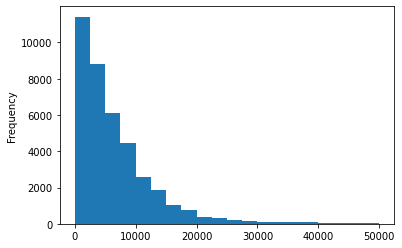

In [ ]:
# bins determines the number of intervals in which I want to split the histogram
df['price_usd'].plot.hist(bins=20)

- It's more interesting if we do the analysis by brands.

* **pro tip:** use seaborn: https://seaborn.pydata.org/tutorial/distributions.html

In [ ]:
import seaborn as sns

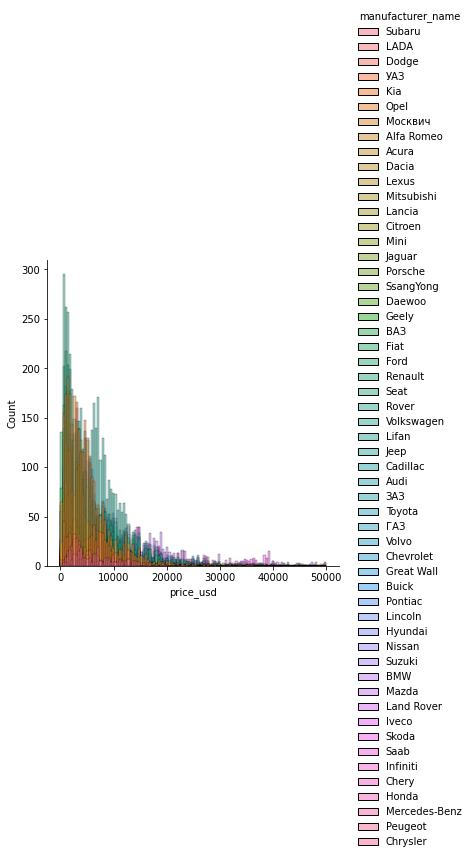

In [ ]:
# hue separates the data into different categories,
# taking in consideration the column that we pointed out,in this case manufacturer_name, 
# manufacturer_name is a categorical var
sns.displot(df, x='price_usd', hue = 'manufacturer_name')

- As we have a ton of categories, the visualization lost his purpose

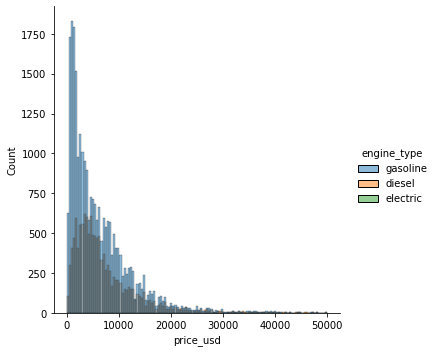

In [ ]:
sns.displot(df, x='price_usd', hue='engine_type')

- The plot is not good enough.

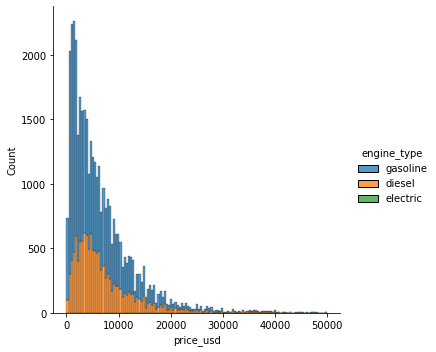

In [ ]:
sns.displot(df, x='price_usd', hue='engine_type', multiple='stack')

- you can't see electric cars because their frequency is very small.


### Descriptive Statistics Inside Categorical Values

- We want to count the frequency of each car inside the categorical var engine_type.

In [ ]:
df.groupby('engine_type').count()

,manufacturer_name,model_name,transmission,color,odometer_value,year_produced,engine_fuel,engine_has_gas,engine_capacity,body_type,...,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,duration_listed
engine_type,,,,,,,,,,,,,,,,,,,,,
diesel,12874,12874,12874,12874,12874,12874,12874,12874,12874,12874,...,12874,12874,12874,12874,12874,12874,12874,12874,12874,12874
electric,10,10,10,10,10,10,10,10,0,10,...,10,10,10,10,10,10,10,10,10,10
gasoline,25647,25647,25647,25647,25647,25647,25647,25647,25647,25647,...,25647,25647,25647,25647,25647,25647,25647,25647,25647,25647


- As you can see we only have 10 electric cars, that's why you couldn't see them on the histogram.

**SEARCHING BY SPECIFICAL CARS**

In [ ]:
Q7_df = df[(df['manufacturer_name'] == 'Audi') & (df['model_name'] == 'Q7')]
Q7_df

,manufacturer_name,model_name,transmission,color,odometer_value,year_produced,engine_fuel,engine_has_gas,engine_type,engine_capacity,...,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,duration_listed
19515,Audi,Q7,automatic,grey,275000,2007,diesel,False,diesel,3.0,...,False,False,False,False,False,False,False,False,False,21
19547,Audi,Q7,automatic,white,105000,2014,diesel,False,diesel,3.0,...,True,True,True,True,True,True,True,True,True,216
19559,Audi,Q7,automatic,other,170000,2006,diesel,False,diesel,3.0,...,True,True,True,True,True,False,True,False,True,24
19574,Audi,Q7,automatic,black,185000,2016,diesel,False,diesel,3.0,...,False,False,True,True,True,True,True,True,True,7
19583,Audi,Q7,automatic,other,210000,2010,diesel,False,diesel,4.2,...,True,True,True,False,True,True,True,True,True,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21756,Audi,Q7,automatic,silver,200000,2008,gasoline,False,gasoline,3.6,...,True,True,True,True,True,True,True,True,True,91
21812,Audi,Q7,automatic,black,276000,2008,diesel,False,diesel,4.2,...,True,True,True,True,True,True,True,True,True,115
21873,Audi,Q7,automatic,black,273000,2006,gasoline,False,gasoline,4.2,...,True,True,False,True,True,True,True,False,True,147
21900,Audi,Q7,automatic,white,283000,2007,diesel,False,diesel,4.2,...,True,True,True,True,True,True,True,True,True,159


<AxesSubplot:xlabel='price_usd', ylabel='Count'>

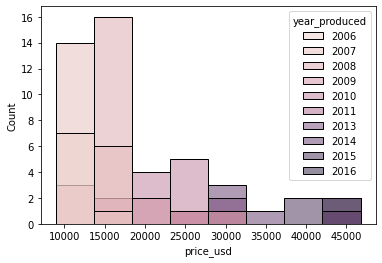

In [ ]:
# In this case we wanna do again a seggregation using Hue, based on the categorical value: year_produced
sns.histplot(Q7_df, x= 'price_usd', hue='year_produced')

In [ ]:
df.columns, df['manufacturer_name'].head(10)

(Index(['manufacturer_name', 'model_name', 'transmission', 'color',
        'odometer_value', 'year_produced', 'engine_fuel', 'engine_has_gas',
        'engine_type', 'engine_capacity', 'body_type', 'has_warranty', 'state',
        'drivetrain', 'price_usd', 'is_exchangeable', 'location_region',
        'number_of_photos', 'up_counter', 'feature_0', 'feature_1', 'feature_2',
        'feature_3', 'feature_4', 'feature_5', 'feature_6', 'feature_7',
        'feature_8', 'feature_9', 'duration_listed'],
       dtype='object'),
 0    Subaru
 1    Subaru
 2    Subaru
 3    Subaru
 4    Subaru
 5    Subaru
 6    Subaru
 7    Subaru
 8    Subaru
 9    Subaru
 Name: manufacturer_name, dtype: object)

In [ ]:
'Ford' in df['manufacturer_name'].values, 'Fusion' in df['model_name'].values

(True, True)

In [ ]:
ff_df = df[(df['manufacturer_name'] == 'Ford') & (df['model_name'] == 'Fusion')]
ff_df

,manufacturer_name,model_name,transmission,color,odometer_value,year_produced,engine_fuel,engine_has_gas,engine_type,engine_capacity,...,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,duration_listed
9484,Ford,Fusion,automatic,silver,350000,2009,gasoline,False,gasoline,1.4,...,True,False,False,False,False,False,False,False,False,139
9518,Ford,Fusion,mechanical,blue,167000,2007,gasoline,False,gasoline,1.6,...,True,False,False,False,False,False,False,False,False,6
9551,Ford,Fusion,automatic,blue,90000,2016,gasoline,False,gasoline,1.5,...,True,False,True,True,True,True,True,True,True,78
9579,Ford,Fusion,mechanical,silver,224520,2005,diesel,False,diesel,1.4,...,True,False,False,False,False,False,False,False,True,57
9590,Ford,Fusion,mechanical,blue,369580,2011,gasoline,False,gasoline,1.4,...,True,False,False,False,False,False,False,False,False,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11965,Ford,Fusion,mechanical,silver,222000,2008,gasoline,False,gasoline,1.4,...,True,False,False,False,False,False,False,False,True,157
11985,Ford,Fusion,automatic,silver,26000,2015,gasoline,False,gasoline,1.5,...,True,False,False,False,False,False,True,True,True,172
11986,Ford,Fusion,automatic,white,52000,2013,gasoline,False,gasoline,1.5,...,True,False,True,False,False,False,True,True,True,173
11993,Ford,Fusion,automatic,silver,91000,2015,gasoline,False,gasoline,1.5,...,True,True,True,True,True,True,True,True,True,183


In [ ]:
ff_df.columns

Index(['manufacturer_name', 'model_name', 'transmission', 'color',
       'odometer_value', 'year_produced', 'engine_fuel', 'engine_has_gas',
       'engine_type', 'engine_capacity', 'body_type', 'has_warranty', 'state',
       'drivetrain', 'price_usd', 'is_exchangeable', 'location_region',
       'number_of_photos', 'up_counter', 'feature_0', 'feature_1', 'feature_2',
       'feature_3', 'feature_4', 'feature_5', 'feature_6', 'feature_7',
       'feature_8', 'feature_9', 'duration_listed'],
      dtype='object')

<AxesSubplot:xlabel='price_usd', ylabel='Count'>

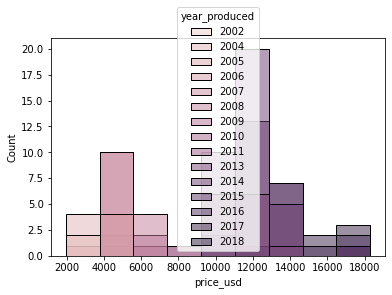

In [ ]:
sns.histplot(ff_df, x='price_usd',hue='year_produced')

<AxesSubplot:xlabel='year_produced', ylabel='Count'>

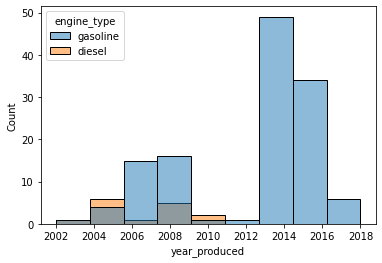

In [ ]:
sns.histplot(ff_df, x='year_produced',hue='engine_type')

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=9ad649ab-d4c1-4930-8346-1d4d9658532a' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>